## Assignment 3

**TU Delft and WUR**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>



__This homework assignment document will guide you through five tasks in cleaning your data.__

1. Reading and Summarizing the Data.
2. Subsetting the Data.
3. Manage Missing Data.
4. Shape the Data.
5. Saving the Results. 

# NB: From now on you should submit 1) your notebook with the answers, remember that comments are good practice, 2) a working Git page with your assignment

## Exercise 1: Loading the data:

- Load the `goodreads.csv` file into Python
- Explore it by looking at first and last 5 rows
- Change the column names to `["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name']`



In [125]:
import pandas as pd
import pathlib as path
import seaborn as sns

In [126]:
goodreads_reviews = pd.read_csv("./data/goodreads.csv", header=None) #read the csv file, header=None makes sure the first line of data is not seen as the column names
goodreads_reviews.head()

,0,1,2,3,4,5,6,7,8,9
0,4.40,136455.0,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974.0,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648.0,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478.0,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746.0,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564.0,"Twilight (Twilight, #1)"
3,4.23,47906.0,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123.0,To Kill a Mockingbird
4,4.23,34772.0,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992.0,Pride and Prejudice


In [127]:
goodreads_reviews.tail()

,0,1,2,3,4,5,6,7,8,9
5995,4.17,2226.0,0767913736,good_reads:book,https://www.goodreads.com/author/show/44565.Ca...,2005.0,/genres/history|/genres/non-fiction|/genres/bi...,dir60/78508.The_River_of_Doubt.html,16618.0,The River of Doubt
5996,3.99,775.0,1416909427,good_reads:book,https://www.goodreads.com/author/show/151371.J...,2006.0,/genres/young-adult|/genres/realistic-fiction|...,dir60/259068.Shug.html,6179.0,Shug
5997,3.78,540.0,1620612321,good_reads:book,https://www.goodreads.com/author/show/5761314....,2012.0,/genres/contemporary|/genres/romance|/genres/y...,dir60/13503247-flawed.html,2971.0,Flawed
5998,3.91,281.0,NaN,good_reads:book,https://www.goodreads.com/author/show/1201952....,2006.0,/genres/religion|/genres/islam|/genres/religio...,dir60/2750008.html,3083.0,Ø£Ø³Ø¹Ø¯ Ø§Ù Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ
5999,4.35,61.0,0786929081,good_reads:book,https://www.goodreads.com/author/show/1023510....,2001.0,/genres/fiction|/genres/fantasy|/genres/magic|...,dir60/66677.Legacy_of_the_Drow_Collector_s_Edi...,3982.0,Legacy of the Drow Collector's Edition (Legacy...


In [128]:
goodreads_reviews.columns = ["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name']
goodreads_reviews.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455.0,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974.0,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648.0,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478.0,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746.0,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564.0,"Twilight (Twilight, #1)"
3,4.23,47906.0,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123.0,To Kill a Mockingbird
4,4.23,34772.0,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992.0,Pride and Prejudice


## Exercise 2: Subsetting the data

- Subset the data by creating new dataframe only with `["rating", 'isbn', 'author_url', 'year', 'genre_urls', 'name']`

In [129]:
goodreads_reviews_subset = goodreads_reviews.loc[:, ['rating', 'isbn', 'author_url', 'year', 'genre_urls', 'name']]
goodreads_reviews_subset

,rating,isbn,author_url,year,genre_urls,name
0,4.40,0439023483,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,"The Hunger Games (The Hunger Games, #1)"
1,4.41,0439358078,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,Harry Potter and the Order of the Phoenix (Har...
2,3.56,0316015849,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,"Twilight (Twilight, #1)"
3,4.23,0061120081,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,To Kill a Mockingbird
4,4.23,0679783261,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,Pride and Prejudice
...,...,...,...,...,...,...
5995,4.17,0767913736,https://www.goodreads.com/author/show/44565.Ca...,2005.0,/genres/history|/genres/non-fiction|/genres/bi...,The River of Doubt
5996,3.99,1416909427,https://www.goodreads.com/author/show/151371.J...,2006.0,/genres/young-adult|/genres/realistic-fiction|...,Shug
5997,3.78,1620612321,https://www.goodreads.com/author/show/5761314....,2012.0,/genres/contemporary|/genres/romance|/genres/y...,Flawed
5998,3.91,NaN,https://www.goodreads.com/author/show/1201952....,2006.0,/genres/religion|/genres/islam|/genres/religio...,Ø£Ø³Ø¹Ø¯ Ø§Ù Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ


## Exercise 3: Manage Missing Data
We’ve got a number of ways in general of dealing with missing data. These involve

1. Dropping off cases (or rows) in the data with any missing variables
2. Excluding variables in the data with any missing data 
3. Selectively choosing indicators with only a limited amount of missing data
4. Replacing missing variables with averages, or other representative values
5. Creating a separate model to predict missing data

- Count the missing values in each column
- Manage the missing values (delete or replace values or leave them as they are) and briefly explain your choice for each column


In [130]:
print ("The amount of missing values in the column 'rating' is", goodreads_reviews_subset['rating'].isna().sum())
print ("The amount of missing values in the column 'isbn' is", goodreads_reviews_subset['isbn'].isna().sum())
print ("The amount of missing values in the column 'author_url' is", goodreads_reviews_subset['author_url'].isna().sum())
print ("The amount of missing values in the column 'year' is", goodreads_reviews_subset['year'].isna().sum())
print ("The amount of missing values in the column 'genre_urls' is", goodreads_reviews_subset['genre_urls'].isna().sum())
print ("The amount of missing values in the column 'name' is", goodreads_reviews_subset['name'].isna().sum())


The amount of missing values in the column 'rating' is 2
The amount of missing values in the column 'isbn' is 477
The amount of missing values in the column 'author_url' is 2
The amount of missing values in the column 'year' is 7
The amount of missing values in the column 'genre_urls' is 62
The amount of missing values in the column 'name' is 2


In [131]:
#for the column 'rating' i've decided to remove the rows, as there are little and barely impact the dataset
goodreads_reviews_subset.isbn.fillna("Unknown", inplace=True)
goodreads_reviews.year.dropna(inplace=True)
goodreads_reviews_subset.tail()




/var/folders/l6/5z4_drtx2lv3p_l7q2v10cg40000gn/T/ipykernel_8498/1661861290.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  goodreads_reviews_subset.isbn.fillna("Unknown", inplace=True)


,rating,isbn,author_url,year,genre_urls,name
5995,4.17,0767913736,https://www.goodreads.com/author/show/44565.Ca...,2005.0,/genres/history|/genres/non-fiction|/genres/bi...,The River of Doubt
5996,3.99,1416909427,https://www.goodreads.com/author/show/151371.J...,2006.0,/genres/young-adult|/genres/realistic-fiction|...,Shug
5997,3.78,1620612321,https://www.goodreads.com/author/show/5761314....,2012.0,/genres/contemporary|/genres/romance|/genres/y...,Flawed
5998,3.91,Unknown,https://www.goodreads.com/author/show/1201952....,2006.0,/genres/religion|/genres/islam|/genres/religio...,Ø£Ø³Ø¹Ø¯ Ø§Ù Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ
5999,4.35,0786929081,https://www.goodreads.com/author/show/1023510....,2001.0,/genres/fiction|/genres/fantasy|/genres/magic|...,Legacy of the Drow Collector's Edition (Legacy...


## Exercise 4: Shape the data
- Parse the `author_url` to create new column named `author`
- Sort the data by putting higher rates go first. If there are overlapping rates, try to put earlier years go first.
- **(Stretch Goal)** Examine how many books were published at each year and find lowest, highest rate of each year. 

In [132]:
author_column = goodreads_reviews['author_url']


goodreads_reviews_subset['author'] = author_column.str.split('.').str[3].str.replace('_'," ")
goodreads_reviews_subset

,rating,isbn,author_url,year,genre_urls,name,author
0,4.40,0439023483,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins
1,4.41,0439358078,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,Harry Potter and the Order of the Phoenix (Har...,J K Rowling
2,3.56,0316015849,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,"Twilight (Twilight, #1)",Stephenie Meyer
3,4.23,0061120081,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,To Kill a Mockingbird,Harper Lee
4,4.23,0679783261,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,Pride and Prejudice,Jane Austen
...,...,...,...,...,...,...,...
5995,4.17,0767913736,https://www.goodreads.com/author/show/44565.Ca...,2005.0,/genres/history|/genres/non-fiction|/genres/bi...,The River of Doubt,Candice Millard
5996,3.99,1416909427,https://www.goodreads.com/author/show/151371.J...,2006.0,/genres/young-adult|/genres/realistic-fiction|...,Shug,Jenny Han
5997,3.78,1620612321,https://www.goodreads.com/author/show/5761314....,2012.0,/genres/contemporary|/genres/romance|/genres/y...,Flawed,Kate Avelynn
5998,3.91,Unknown,https://www.goodreads.com/author/show/1201952....,2006.0,/genres/religion|/genres/islam|/genres/religio...,Ø£Ø³Ø¹Ø¯ Ø§Ù Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ,A id al Qarni


In [133]:
goodreads_reviews_subset.sort_values(['rating', 'year'],ascending=[False, True]) 
#Sort the data using the 'rating' column first with ascending = False so the highest number is on top, if values are the same, use 'year' column to sort in a ascending way

,rating,isbn,author_url,year,genre_urls,name,author
2909,5.00,0983002215,https://www.goodreads.com/author/show/6589034....,2011.0,NaN,Family Secrets,Rebekah McClew
2145,5.00,1300589469,https://www.goodreads.com/author/show/6906561....,2012.0,NaN,A Book About Absolutely Nothing.,I M Nobody
2903,5.00,0983002282,https://www.goodreads.com/author/show/6589034....,2012.0,NaN,Obscured Darkness (Family Secrets #2),Rebekah McClew
4473,5.00,Unknown,https://www.goodreads.com/author/show/6896621....,2012.0,NaN,Patience's Love,Ronda Paige
5692,5.00,Unknown,https://www.goodreads.com/author/show/5989528....,2012.0,NaN,Abstraction In Theory - Laws Of Physical Trans...,Subhajit Ganguly
...,...,...,...,...,...,...,...
2609,2.90,Unknown,https://www.goodreads.com/author/show/7707820....,2013.0,/genres/romance|/genres/realistic-fiction|/gen...,How To Be A Perfect Girl,Mary Williams
5979,2.77,0060988649,https://www.goodreads.com/author/show/7025.Gre...,2001.0,/genres/fantasy|/genres/fiction|/genres/myster...,Lost,Gregory Maguire
3738,2.00,0983650322,https://www.goodreads.com/author/show/9414.Vic...,2011.0,/genres/young-adult|/genres/science-fiction|/g...,"Revealing Eden (Save the Pearls, #1)",Victoria Foyt
3643,NaN,Unknown,NaN,NaN,NaN,NaN,NaN


## Exercise 5: Saving the results
- Save the cleaned dataframe as 'hw-03-cleaned.csv' in data folder

In [134]:
goodreads_reviews_subset.to_csv('data/hw-03-cleaned')


## Exercise 6: Investigate the relationship between the number of reviews and the average rating for books in the dataset cleaned-goodreads.csv procided.

- Calculate the correlation coefficient. Give me a short definition of this coefficient
- Create a scatter plot showing the relationship between these two features.
- Based on the plot and the correlation, provide a brief interpretation of the relationship.

### Python Tools: Use pandas and numpy for correlation, and matplotlib or seaborn for the scatter plot.

In [135]:
cleaned_goodreads = pd.read_csv("./data/cleaned-goodreads.csv")
print(cleaned_goodreads['rating'].corr(cleaned_goodreads['rating_count']))
#the correlations coefficient indicates the statistical relationship between two sets of linear data. The correlation coefficient can range from -1 to 1, where close to +-1 the statistical correlation is high, and it being close to 0 the correlation is low.

-0.02845161798011856


<Axes: xlabel='rating_count', ylabel='rating'>

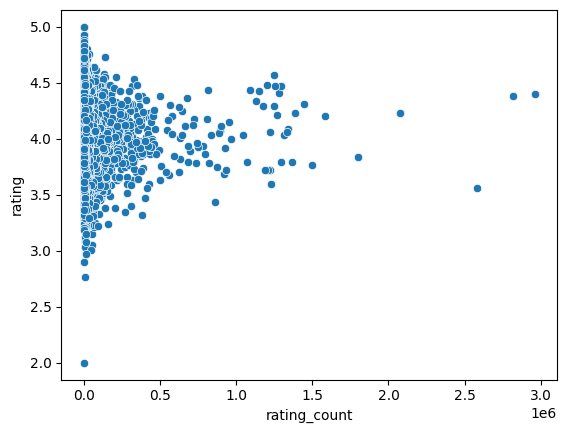

In [141]:
sns.scatterplot(cleaned_goodreads, x = 'rating_count', y = 'rating')

In [ ]:
'''
The calculation of the correlation coeffiecient is -0.02. This number is very close to 0 which indicates that there is little statistical correlation.
This is also displayed by the scatterplot. The majority of the books have between 0 and 0.5*10^6 rating, and their ratings primarily range from 4.5 to 3.0.
The ratings are not obviously related to the rating count when looking at the graph, which confirms the result of the correlation coefficient calculation.
'''


## Exercise 7: Calculate the following descriptive statistics for the numerical features (e.g., number of reviews, average rating, etc.):
- Mean
- Median
- Standard Deviation
- Range
- Create a histogram or box plot for at least one of the numerical features, highlighting any skewness or outliers.
    
### Python Tools: Use pandas for data manipulation and matplotlib or seaborn for visualization.

4.041997330218589
4.05
0.2605090887217234
3.0


<Axes: xlabel='rating', ylabel='Count'>

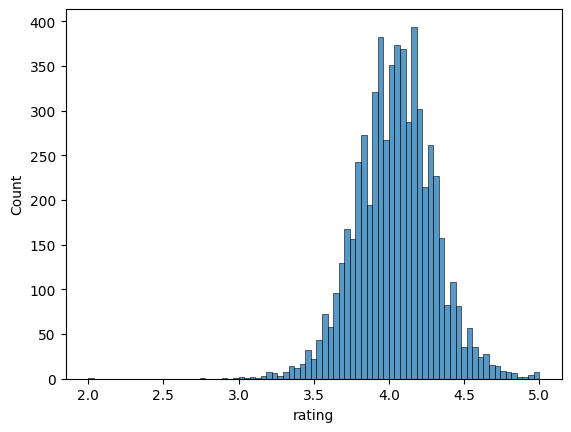

In [155]:
print(cleaned_goodreads['rating'].mean())
print(cleaned_goodreads['rating'].median())
print(cleaned_goodreads['rating'].std())
print(cleaned_goodreads['rating'].max()-cleaned_goodreads['rating'].min())

sns.histplot(cleaned_goodreads['rating'])